# Tutorial on `Jupyter` notebook, `pandas`, and `seaborn`

This notebook gives a brief tutorial on using `Jupyter` notebook, `pandas`, and `seaborn` to analyze data on protein designs.

## `Jupyter` notebooks are a great way to organize code and visualize the results of an analysis

Jupyter notebooks consist of a series of cells. There are two main kinds of cells:

* **text cells**: are really useful for commenting code and describing what is going on in the notebook (this is an example of a text cell)
* **code cells**: can be used to execute a specific block of code (the below cell is an example of a code cell)

For instance, say that we wanted to know how many times the letter "a" occurs in Parisa's name, a question that everyone is probably dying to know. We could create a cell of code to tell us the answer:

In [1]:
name = 'Parisa'
letter = 'a'
number = name.count(letter)
print("The number is: {0}".format(number))

The number is: 2


Very conveniently, the output of the code is shown directly below the cell. This makes it really easy to link a result to the code that produced it, whereas this can be less clear for monolithic scripts that cary out 100 different things.

Another convenient thing is that variable names cary over between cells, just like if they were in the same script. For example:

In [2]:
print("The name variable is still {0}".format(name))

The name variable is still Parisa


So, just as in any script, be careful not to accidentally overwrite variables.

## `pandas` is a great way to analyze data that is in matrix form -- a form that we use all the time

For instance, I will use it to analyze data on some of Gabe Rocklin's miniproteins.

To start, I will first import `pandas` in the same way you'd do in any `Python` script. (Note: usually, I import all libraries at once at the top of a notebook).

In [3]:
import pandas

Next, I will read in data from a Rosetta scores file.

In [4]:
# Read in data
computational_scores_df = pandas.read_csv(
    'data/rd4_relax_scored_filtered_betanov15.sc', # file name
    sep='\t' # columns are separated by tabs
)

# Set the "index" of the dataframe
computational_scores_df.set_index('description', inplace=True)

# Show the first several rows
computational_scores_df.head()

,SCORE:,total_score,AlaCount,hbond_lr_bb_per_res,buried_minus_exposed,buried_np,buried_over_exposed,cavity_volume,contact_all,degree,...,nearest_chymo_cut_to_Cterm,nearest_tryp_cut_to_Nterm,nearest_tryp_cut_to_Cterm,nearest_tryp_cut_to_term,nearest_chymo_cut_to_term,linear_reg_pred,logistic_reg_pred,gb_reg_pred,logistic_alltop_pred,sequence
description,,,,,,,,,,,,,,,,,,,,,
EEHEE_rd4_0017.pdb,SCORE:,-160.805,4.0,-0.351,3620.422,5344.211,3.100,0.0,172.0,9.930,...,9,11,16,11,9,1.357650,1.149329,0.959308,0.970023,AEVHVNGVTYKFNNPEEAVKFALELAKKLGMQIEFHGEQIHVE
EEHEE_rd4_0011.pdb,SCORE:,-162.629,4.0,-0.388,3432.576,5231.788,2.908,0.0,157.0,9.791,...,9,20,12,12,9,1.409006,1.160602,0.973295,0.947713,ATVHVNGVQYDFDNPEEAVKFALKVAKKLNLRIEFHGNTIHIE
EEHEE_rd4_0009.pdb,SCORE:,-157.397,3.0,-0.369,3494.380,5325.690,2.908,0.0,159.0,9.977,...,9,20,1,1,9,1.339441,1.242149,0.973760,0.955733,VTVHVGNVTYHFNNPEEAVKFALEMAKKLNLEVRFHGNTIKVK
EEHEE_rd4_0012.pdb,SCORE:,-156.772,3.0,-0.380,3483.933,5277.466,2.942,0.0,176.0,9.744,...,9,20,3,3,9,1.381880,1.175732,0.971164,0.969101,ITIDVNGVTYHFNNPEEAYKFAVKIAKDLNLRIEFHGNTVKIE
EEHEE_rd4_0019.pdb,SCORE:,-153.295,2.0,-0.366,3438.363,5277.682,2.869,0.0,163.0,9.837,...,9,20,5,5,8,1.273464,1.205246,0.954964,0.943909,TQVHVGGYTYHFNNPEEVLKFALEMARKLNLEVRFHGDRVEIH


Delete the `SCORE:` column

In [5]:
del computational_scores_df['SCORE:']

I will also read in data on these proteins from Gabe's high-throughput stability assay.

In [6]:
# Read in data
stability_scores_df = pandas.read_csv(
    'data/rd4_stability_scores',
    sep='\t'
)

# Set the index
stability_scores_df.set_index('name', inplace=True)

# Show the first several rows
stability_scores_df.head()

,sequence,assay_library,ec50_t,ec50_95ci_lbound_t,ec50_95ci_ubound_t,ec50_95ci_t,ec50_pred_t,ec50_rise_t,stabilityscore_t,ec50_c,ec50_95ci_lbound_c,ec50_95ci_ubound_c,ec50_95ci_c,ec50_pred_c,ec50_rise_c,stabilityscore_c,stabilityscore
name,,,,,,,,,,,,,,,,,
1A11,GSEKMSTAISVLLAQAVFLLLTSQRGSGNGSGGNGSGGNGSGNGSG...,4.0,2.69,2.5,2.9,0.4,3.01,-0.32,-0.15,2.52,2.4,2.7,0.3,1.41,1.12,0.53,-0.15
1A11_PG_hp,GKREATQMLQVLLLSAVLAIFSTSSGSGNGSGGNGSGGNGSGNGSG...,4.0,0.49,0.2,1.0,0.8,1.54,-1.04,-0.50,1.02,0.5,1.3,0.8,1.97,-0.96,-0.46,-0.50
1AIE,EYFTLQIRGRERFEMFRELNEALELKDAQAGSGNGSGGNGSGGNGS...,4.0,4.07,4.0,4.1,0.1,0.49,3.58,1.71,3.96,3.9,4.0,0.1,0.61,3.34,1.60,1.60
1AIE_PG_hp,QMYEAEFEGQRRIEFFKRANRLLTLEELDAGSGNGSGGNGSGGNGS...,4.0,0.02,-0.5,0.1,0.6,0.34,-0.32,-0.15,-0.12,-0.5,0.1,0.6,-0.02,-0.10,-0.05,-0.15
1AMB,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGNGSGGNGSGGNGSGNGS...,4.0,1.24,1.1,1.4,0.3,2.40,-1.16,-0.55,0.36,-0.5,1.2,1.7,1.47,-1.11,-0.53,-0.55


You can merge two dataframes together if they have columns with overlapping values. For instance, I will merge the computational and experimental data using the PDB names.

In [7]:
scores_df = computational_scores_df.merge(
    stability_scores_df, # the second dataframe to merge with the first
    left_index=True, right_index=True, # merge on the indices
    how='left', # only use keys from the left dataframe
    validate='1:1' # make sure indices are unique in both dataframes
)
scores_df.head()

,total_score,AlaCount,hbond_lr_bb_per_res,buried_minus_exposed,buried_np,buried_over_exposed,cavity_volume,contact_all,degree,dslf_fa13,...,ec50_rise_t,stabilityscore_t,ec50_c,ec50_95ci_lbound_c,ec50_95ci_ubound_c,ec50_95ci_c,ec50_pred_c,ec50_rise_c,stabilityscore_c,stabilityscore
description,,,,,,,,,,,,,,,,,,,,,
EEHEE_rd4_0017.pdb,-160.805,4.0,-0.351,3620.422,5344.211,3.100,0.0,172.0,9.930,0.0,...,2.93,1.40,3.70,3.6,3.8,0.2,0.42,3.28,1.56,1.40
EEHEE_rd4_0011.pdb,-162.629,4.0,-0.388,3432.576,5231.788,2.908,0.0,157.0,9.791,0.0,...,3.49,1.66,3.41,3.4,3.5,0.1,-0.12,3.53,1.68,1.66
EEHEE_rd4_0009.pdb,-157.397,3.0,-0.369,3494.380,5325.690,2.908,0.0,159.0,9.977,0.0,...,2.91,1.39,3.84,3.7,3.9,0.2,0.58,3.25,1.55,1.39
EEHEE_rd4_0012.pdb,-156.772,3.0,-0.380,3483.933,5277.466,2.942,0.0,176.0,9.744,0.0,...,2.94,1.40,3.80,3.8,3.8,0.0,0.39,3.41,1.63,1.40
EEHEE_rd4_0019.pdb,-153.295,2.0,-0.366,3438.363,5277.682,2.869,0.0,163.0,9.837,0.0,...,2.73,1.30,3.50,3.4,3.6,0.2,0.38,3.11,1.48,1.30


Once you data is in a `pandas` dataframe, there are many computations that are quick and easy to do. Basically, you can do a lot of things `Excel` can do, and more, in a scripted fashion.

For instance, we can compute the mean `total_score` of all designs:

In [8]:
scores_df['total_score'].mean()

-144.77392519389542

We can also make new columns that are computed as a function of existing ones. For instance, we can divide the `total_score` column by the `n_res` column to compute the score per residue.

In [9]:
scores_df['score_per_res'] = \
    scores_df['total_score'] / scores_df['n_res']
scores_df[['total_score', 'n_res', 'score_per_res']].head()

,total_score,n_res,score_per_res
description,,,
EEHEE_rd4_0017.pdb,-160.805,43,-3.739651
EEHEE_rd4_0011.pdb,-162.629,43,-3.782070
EEHEE_rd4_0009.pdb,-157.397,43,-3.660395
EEHEE_rd4_0012.pdb,-156.772,43,-3.645860
EEHEE_rd4_0019.pdb,-153.295,43,-3.565000


Or say we wanted to know how many times alanine occurs in each sequence. That would be easy to do by analyzing the `sequence` column:

In [10]:
# Both dataframes we merged had a column called "sequence", so
# now there are two columns: "sequence_x" and "sequence_y". I
# will rename one of them to be just "sequence"
scores_df.rename(
    columns={'sequence_x':'sequence'},
    inplace=True
)

# Next, I will compute the number of times alanine occurs in
# each sequence using the "apply" method to apply the same
# function (in this case a function that counts the number of
# "A"s) to each row in a given column (in this case the
# "sequence" column)
scores_df['n_ala'] = scores_df['sequence'].apply(
    lambda x: x.count('A')
)
scores_df[['sequence', 'n_ala']].head()

,sequence,n_ala
description,,
EEHEE_rd4_0017.pdb,AEVHVNGVTYKFNNPEEAVKFALELAKKLGMQIEFHGEQIHVE,4
EEHEE_rd4_0011.pdb,ATVHVNGVQYDFDNPEEAVKFALKVAKKLNLRIEFHGNTIHIE,4
EEHEE_rd4_0009.pdb,VTVHVGNVTYHFNNPEEAVKFALEMAKKLNLEVRFHGNTIKVK,3
EEHEE_rd4_0012.pdb,ITIDVNGVTYHFNNPEEAYKFAVKIAKDLNLRIEFHGNTVKIE,3
EEHEE_rd4_0019.pdb,TQVHVGGYTYHFNNPEEVLKFALEMARKLNLEVRFHGDRVEIH,2


## Another advantage of having you data in a `pandas` dataframe is that you can use `seaborn` to easily plot it

First, I will import `matplotlib` and `seaborn`, as the latter uses the former.

In [11]:
# Import matplotlib and use the "inline" magic to easily
# display plots within the notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn and change a few global variables to
# alter the aesthetic of the below plots
import seaborn as sns
sns.set(
    font_scale=2, # make the font larger; default is pretty small
    style='ticks', # make the background white with black lines
    palette='colorblind' # a color palette that is colorblind friendly!
)

One thing we could plot is the distribution in score per residue:

/software/conda/envs/jupyterhub/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


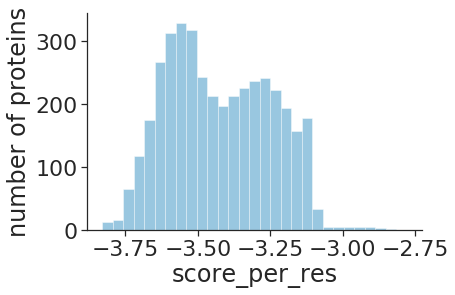

In [12]:
sns.distplot(scores_df['score_per_res'], kde=False)
plt.ylabel('number of proteins')
sns.despine()
plt.show()

Plots are shown right below the cell!

We could also show this distribution broken down by topology:

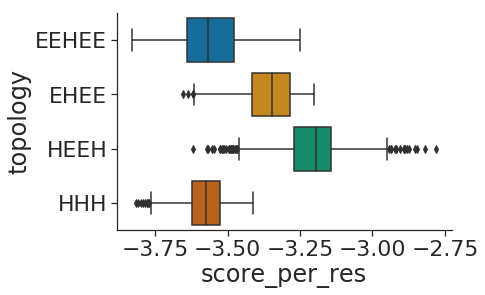

In [13]:
# First, I will get the topology for each design
def get_topology(name):
    if 'HHH' in name:
        return 'HHH'
    elif 'HEEH' in name:
        return 'HEEH'
    elif 'EEHEE' in name:
        return 'EEHEE'
    elif 'EHEE' in name:
        return 'EHEE'
    else:
        raise ValueError("Could not parse: {0}".format(name))
scores_df['topology'] = scores_df.apply(
    lambda row: get_topology(row.name),
    axis=1
)

# Next, I will plot `score_per_res` as a function of
# topologoy using box plots
sns.boxplot(x='score_per_res', y='topology', data=scores_df)
sns.despine()
plt.show()

It is straightforward to divide things up even further, for instance by whether or not the design was stable:

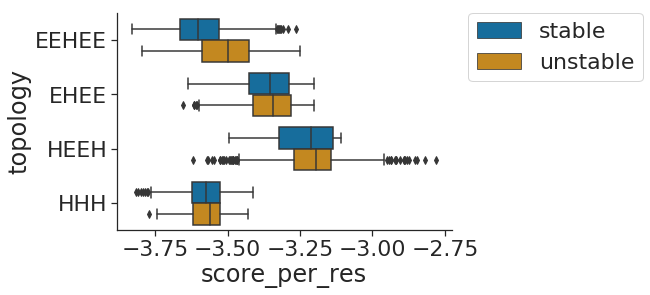

In [14]:
# First, I will add a column specifying whether or not each
# design was found to be stable
scores_df['stability'] = scores_df['stabilityscore'].apply(
    lambda x: 'stable' if x > 1 else 'unstable'
)

# Next, I will plot the distribution of `score_per_res` as
# a function of topology and stability
sns.boxplot(
    x='score_per_res', y='topology', data=scores_df,
    hue='stability'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.show()

Or, we could easily plot the number of stable designs by topology

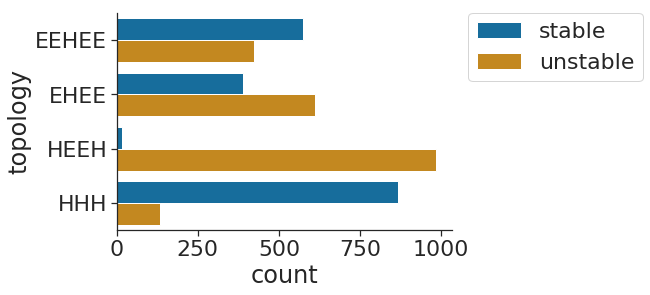

In [15]:
sns.countplot(
    y='topology', data=scores_df, hue='stability'
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Using "tidy" dataframes can be handy when plotting. For instance, say you wanted to compare amino-acid frequencies between topologies...

I will start by computing the frequency of each amino acid in each sequence.

In [16]:
# Get a list of the 20 amino acids
from Bio.Alphabet import IUPAC
amino_acids = IUPAC.IUPACProtein.letters
amino_acids = list(amino_acids)
assert len(amino_acids) == 20

# Compute the frequency of each amino acid in each design
for amino_acid in amino_acids:
    scores_df['freq_{0}'.format(amino_acid)] = \
        scores_df['sequence'].apply(
            lambda x: x.count(amino_acid) / len(x)
        )

# Show dataframe with frequencies
columns_with_amino_acid_frequencies = [
    'freq_{0}'.format(amino_acid)
    for amino_acid in amino_acids
]
scores_df[['topology'] + columns_with_amino_acid_frequencies].head()

,topology,freq_A,freq_C,freq_D,freq_E,freq_F,freq_G,freq_H,freq_I,freq_K,...,freq_M,freq_N,freq_P,freq_Q,freq_R,freq_S,freq_T,freq_V,freq_W,freq_Y
description,,,,,,,,,,,,,,,,,,,,,
EEHEE_rd4_0017.pdb,EEHEE,0.093023,0.0,0.000000,0.162791,0.069767,0.069767,0.069767,0.046512,0.093023,...,0.023256,0.069767,0.023256,0.046512,0.000000,0.0,0.023256,0.116279,0.0,0.023256
EEHEE_rd4_0011.pdb,EEHEE,0.093023,0.0,0.046512,0.093023,0.069767,0.046512,0.069767,0.069767,0.093023,...,0.000000,0.093023,0.023256,0.023256,0.023256,0.0,0.046512,0.116279,0.0,0.023256
EEHEE_rd4_0009.pdb,EEHEE,0.069767,0.0,0.000000,0.093023,0.069767,0.046512,0.069767,0.023256,0.116279,...,0.023256,0.116279,0.023256,0.000000,0.023256,0.0,0.069767,0.162791,0.0,0.023256
EEHEE_rd4_0012.pdb,EEHEE,0.069767,0.0,0.046512,0.093023,0.069767,0.046512,0.046512,0.116279,0.093023,...,0.000000,0.116279,0.023256,0.000000,0.023256,0.0,0.069767,0.093023,0.0,0.046512
EEHEE_rd4_0019.pdb,EEHEE,0.046512,0.0,0.023256,0.116279,0.069767,0.069767,0.093023,0.023256,0.046512,...,0.023256,0.069767,0.023256,0.023256,0.069767,0.0,0.046512,0.116279,0.0,0.046512


It turns out that the way the data is currently formatted is actually not very convenient for plotting with `seaborn`. However, we can make it more convenient if we make the dataframe "tidy":

In [17]:
# First, I will rename columns to be single amino-acid letters
scores_df.rename(
    columns={
        'freq_{0}'.format(amino_acid) : amino_acid
        for amino_acid in amino_acids
    },
    inplace=True
)

# Next, I will melt the dataframe so that there is one column each
# for design, topology, amino acid, and amino-acid frequency
id_vars = ['description', 'topology']
aa_freqs_df = scores_df.reset_index().melt(
    id_vars=id_vars, value_vars=amino_acids, var_name='amino_acid',
    value_name='frequency'
)
aa_freqs_df.head()

,description,topology,amino_acid,frequency
0,EEHEE_rd4_0017.pdb,EEHEE,A,0.093023
1,EEHEE_rd4_0011.pdb,EEHEE,A,0.093023
2,EEHEE_rd4_0009.pdb,EEHEE,A,0.069767
3,EEHEE_rd4_0012.pdb,EEHEE,A,0.069767
4,EEHEE_rd4_0019.pdb,EEHEE,A,0.046512


In general, "tidying" a dataframe involves taking a short/wide dataframe and making it long/narrow. In this case, instead of having one row per design and one column for each of the 20 amino acids, with the values of those columns giving the frequency of that amino acid, we now have 20 rows per design, with one row for each amino acid. For example, here are all entries for a single design:

In [18]:
aa_freqs_df[
    aa_freqs_df['description'] == 'EEHEE_rd4_0017.pdb'
]

,description,topology,amino_acid,frequency
0,EEHEE_rd4_0017.pdb,EEHEE,A,0.093023
3997,EEHEE_rd4_0017.pdb,EEHEE,C,0.000000
7994,EEHEE_rd4_0017.pdb,EEHEE,D,0.000000
11991,EEHEE_rd4_0017.pdb,EEHEE,E,0.162791
15988,EEHEE_rd4_0017.pdb,EEHEE,F,0.069767
19985,EEHEE_rd4_0017.pdb,EEHEE,G,0.069767
23982,EEHEE_rd4_0017.pdb,EEHEE,H,0.069767
27979,EEHEE_rd4_0017.pdb,EEHEE,I,0.046512
31976,EEHEE_rd4_0017.pdb,EEHEE,K,0.093023
35973,EEHEE_rd4_0017.pdb,EEHEE,L,0.069767


This makes it really easy to plot amino-acid frequencies:

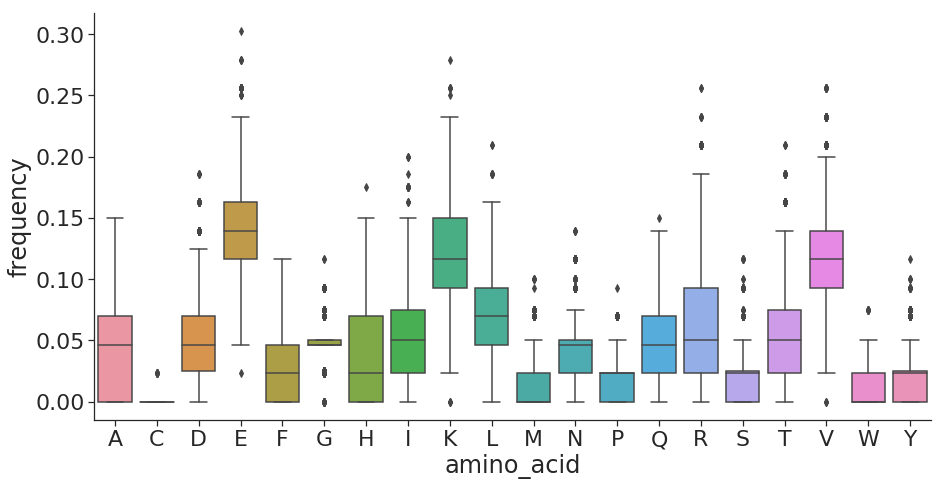

In [19]:
fig = plt.figure(figsize=(15,7.5))
sns.boxplot(
    x="amino_acid", y="frequency", data=aa_freqs_df
)
sns.despine()
plt.show()

And it also makes it really easy to break down the plot by additional variables. For instace, we could plot amino-acid frequencies as a function of topology:

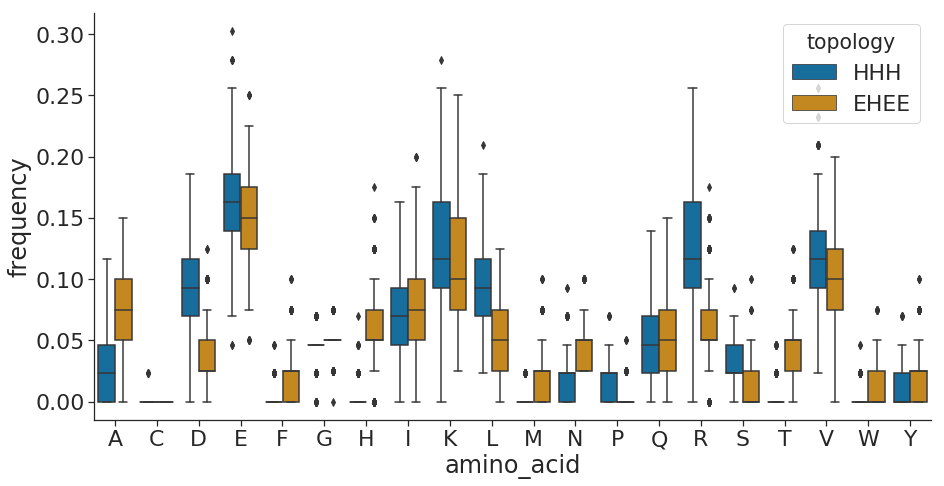

In [20]:
fig = plt.figure(figsize=(15,7.5))
topology_order = ['HHH', 'EHEE']
sns.boxplot(
    x="amino_acid", y="frequency", data=aa_freqs_df,
    hue='topology', hue_order=topology_order
)
sns.despine()
plt.show()

... or any other variable that is in your dataframe. For example, you could compare amino-acid frequencies in designs made using different protocols, or stable vs. unstable designs.

So, when you're plotting data, it can be worth "tidying" it up before making the plot! A quick Google search will provide much more information on "tidy" dataframes.

Also, there is a wealth of online documentation and Q&A forums for `Jupyter` notebooks, `pandas`, and `seaborn`. So, if you're having a problem, just Google it!

## Jupyter notebooks can be tracked on GitHub for easy version control and sharing

I have notebooks that provide examples of:

* an updated version of Gabe's pipeline for scoring monomers, all in one script (https://github.com/Haddox/score_monomeric_designs/)
* analyzing data from Gabe's high-throughput stability assay (https://github.com/Haddox/prot_stab_analysis_pipeline)

Please send me a message if you'd like access to the code!

## Make an HTML or PDF version of the notebook so that others can see it without having to open it with `Jupyter`

In [21]:
!jupyter nbconvert analysis_code.ipynb

[NbConvertApp] Converting notebook analysis_code.ipynb to html
[NbConvertApp] Writing 475006 bytes to analysis_code.html
